In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2019-12-23 15:48:17--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2019-12-23 15:48:17 (136 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [19]:
model = Sequential()
model.add(Embedding(total_words, 128, input_length=(max_sequence_len-1)))# Your Embedding Layer)
model.add(Bidirectional(LSTM(128, return_sequences=True)))# An LSTM Layer)
model.add(Dropout(0.2))# A dropout layer)
model.add(LSTM(24))# Another LSTM Layer)
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))# A Dense Layer including regularizers)
model.add(Dense(total_words, activation='softmax'))# A Dense Layer)
# Pick an optimizer
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['acc'])# Pick a loss function and an optimizer)
print(model.summary())


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 10, 128)           411008    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 10, 256)           263168    
_________________________________________________________________
dropout_6 (Dropout)          (None, 10, 256)           0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 24)                26976     
_________________________________________________________________
dense_6 (Dense)              (None, 1605)              40125     
_________________________________________________________________
dense_7 (Dense)              (None, 3211)              5156866   
Total params: 5,898,143
Trainable params: 5,898,143
Non-trainable params: 0
____________________________________________

In [20]:
 history = model.fit(predictors, label, epochs=500, verbose=1)

Train on 15462 samples
Epoch 1/500
15462/15462 [==============================] - 20s 1ms/sample - loss: 6.8513 - acc: 0.0213
Epoch 2/500
15462/15462 [==============================] - 19s 1ms/sample - loss: 6.4974 - acc: 0.0224
Epoch 3/500
15462/15462 [==============================] - 19s 1ms/sample - loss: 6.3995 - acc: 0.0272
Epoch 4/500
15462/15462 [==============================] - 20s 1ms/sample - loss: 6.3025 - acc: 0.0310
Epoch 5/500
15462/15462 [==============================] - 20s 1ms/sample - loss: 6.2240 - acc: 0.0356
Epoch 6/500
15462/15462 [==============================] - 19s 1ms/sample - loss: 6.1603 - acc: 0.0379
Epoch 7/500
15462/15462 [==============================] - 19s 1ms/sample - loss: 6.0940 - acc: 0.0382
Epoch 8/500
15462/15462 [==============================] - 19s 1ms/sample - loss: 6.0242 - acc: 0.0399
Epoch 9/500
15462/15462 [==============================] - 19s 1ms/sample - loss: 5.9412 - acc: 0.0455
Epoch 10/500
15462/15462 [========================

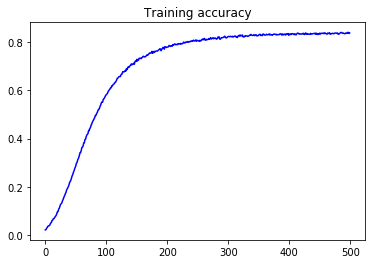

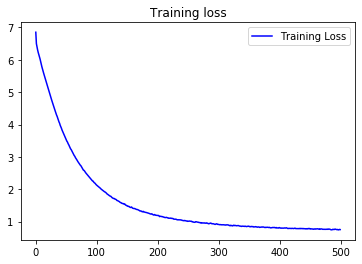

In [21]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [30]:
seed_text = "love and kiss"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
final_text = seed_text.split(' \' ')

for prose in final_text:
	print(prose)

love and kiss the tender inward of love will go grave ground beauteous dear dwell in weary must scorn of heart did shame befits array lie have in mine own self bring forth taken say yet be ill will be pride well that you be he most judgment toil'd may new more are in mine own verse go best well dyed brow best had live writ doth live from war that new gives best untrue thence one part doth day was be another art
be not be gentle verse in pride did stand you bright days did thought ill prove me do
